In [1]:
from lbmpy.session import *

# Demo: Create lbmpy Method from Scratch

<img src='../img/collision_space.svg' width="90%">


### Defining transformation to collision space

In [2]:
from lbmpy.moments import moment_matrix, moments_up_to_component_order, exponents_to_polynomial_representations
moment_exponents = list(moments_up_to_component_order(2, 2))
moment_exponents

In [3]:
moments = exponents_to_polynomial_representations(moment_exponents)
moments

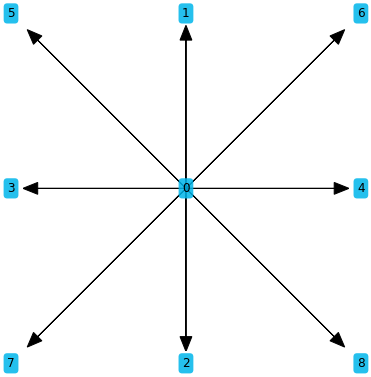

In [4]:
from lbmpy.stencils import get_stencil
d2q9 = get_stencil("D2Q9", ordering='walberla')
ps.stencil.plot(d2q9)

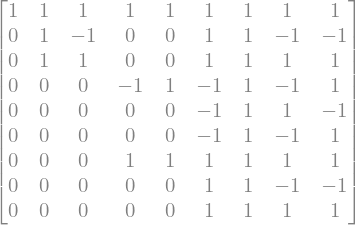

In [5]:
M = moment_matrix(moments, stencil=d2q9)
M

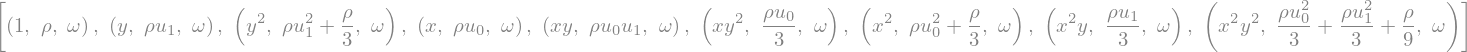

In [6]:
from lbmpy.maxwellian_equilibrium import get_moments_of_continuous_maxwellian_equilibrium

eq_moments = get_moments_of_continuous_maxwellian_equilibrium(moments, order=2, dim=2, 
                                                              c_s_sq=sp.Rational(1, 3))
omega = sp.symbols("omega")
relaxation_info = [(moment, eq_value, omega) for moment, eq_value in zip(moments, eq_moments)]
relaxation_info

In [7]:
from lbmpy.methods.creationfunctions import create_generic_mrt

force_model = forcemodels.Guo(sp.symbols("F_:2"))
method = create_generic_mrt(d2q9, relaxation_info, compressible=False, force_model=force_model, cumulant=False)
method

Moment,Eq. Value,Relaxation Rate
$1$,$\rho$,$\omega$
$y$,$\rho u_{1}$,$\omega$
$y^{2}$,$\rho u_{1}^{2} + \frac{\rho}{3}$,$\omega$
$x$,$\rho u_{0}$,$\omega$
$x y$,$\rho u_{0} u_{1}$,$\omega$
$x y^{2}$,$\frac{\rho u_{0}}{3}$,$\omega$
$x^{2}$,$\rho u_{0}^{2} + \frac{\rho}{3}$,$\omega$
$x^{2} y$,$\frac{\rho u_{1}}{3}$,$\omega$
$x^{2} y^{2}$,$\frac{\rho u_{0}^{2}}{3} + \frac{\rho u_{1}^{2}}{3} + \frac{\rho}{9}$,$\omega$


### Example of a update equation without simplifications

In [8]:
collision_rule = method.get_collision_rule()
collision_rule

$$vel0Term \leftarrow f_{4} + f_{6} + f_{8}$$
$$vel1Term \leftarrow f_{1} + f_{5}$$
$$\rho \leftarrow f_{0} + f_{2} + f_{3} + f_{7} + vel0Term + vel1Term$$
$$u_{0} \leftarrow \frac{F_{0}}{2} - f_{3} - f_{5} - f_{7} + vel0Term$$
$$u_{1} \leftarrow \frac{F_{1}}{2} - f_{2} + f_{6} - f_{7} - f_{8} + vel1Term$$
$$forceTerm_{0} \leftarrow \left(1 - \frac{\omega}{2}\right) \left(- \frac{4 F_{0} u_{0}}{3} - \frac{4 F_{1} u_{1}}{3}\right)$$
$$forceTerm_{1} \leftarrow \left(1 - \frac{\omega}{2}\right) \left(- \frac{F_{0} u_{0}}{3} + \frac{F_{1} \left(2 u_{1} + 1\right)}{3}\right)$$
$$forceTerm_{2} \leftarrow \left(1 - \frac{\omega}{2}\right) \left(- \frac{F_{0} u_{0}}{3} + \frac{F_{1} \left(2 u_{1} - 1\right)}{3}\right)$$
$$forceTerm_{3} \leftarrow \left(1 - \frac{\omega}{2}\right) \left(\frac{F_{0} \left(2 u_{0} - 1\right)}{3} - \frac{F_{1} u_{1}}{3}\right)$$
$$forceTerm_{4} \leftarrow \left(1 - \frac{\omega}{2}\right) \left(\frac{F_{0} \left(2 u_{0} + 1\right)}{3} - \frac{F_{1} u_{1}}{3}\right)$$
$$forceTerm_{5} \leftarrow \left(1 - \frac{\omega}{2}\right) \left(\frac{F_{0} \left(2 u_{0} - 3 u_{1} - 1\right)}{12} + \frac{F_{1} \left(- 3 u_{0} + 2 u_{1} + 1\right)}{12}\right)$$


### Generic simplification strategy - common subexpresssion elimination

In [9]:
generic_strategy = ps.simp.SimplificationStrategy()
generic_strategy.add(ps.simp.sympy_cse)
generic_strategy.create_simplification_report(collision_rule)

Name,Runtime,Adds,Muls,Divs,Total
OriginalTerm,-,293,261,0,554
sympy_cse,38.68 ms,114,67,0,181


### A custom simplification strategy for moment-based methods

In [10]:
simplification_strategy = create_simplification_strategy(method)
simplification_strategy.create_simplification_report(collision_rule)
simplification_strategy.add(ps.simp.sympy_cse)

### Seeing the simplification in action

In [11]:
simplification_strategy.show_intermediate_results(collision_rule, symbols=[sp.Symbol("d_7")])

<pystencils.simp.simplificationstrategy.SimplificationStrategy.show_intermediate_results.<locals>.IntermediateResults at 0x7fd84078d828>